In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import gauss
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

NUM_SOURCE = 6
X1 = 21
X2 = 21
V = 441
N = 240

LABEL = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth']

### Question 1.1

In [21]:
def construct(AV, IV, duration):
    """ Construct matrix TC """
    
    tc = np.array([])
    iv_count = IV
    
    # onsets arrival vector
    tc = np.zeros(AV)
    
    while len(tc) < N:
        
        # duration of ones
        
        for i in range(duration):
            if len(tc) >= N:
                break
            tc = np.append(tc, 1)

        # increment vector
        while (len(tc) < iv_count) & (len(tc) < N):
            tc = np.append(tc, 0)
        iv_count += IV
        
        # onsets arrival vector
        for i in range(AV):
            if len(tc) >= N:
                break
            tc = np.append(tc, 0)
        
    # Standardise
    tc = tc - np.mean(tc)
    tc = tc / np.std(tc)
    
    return tc

In [22]:
#(AV) = [0,20,0,0,0,0], (IV) = [30,45,60,40,40,40], duration of ones = [15,20,25,15,20,25].
tc1 = construct(0, 30, 15)
tc2 = construct(20, 45, 20)
tc3 = construct(0, 60, 25)
tc4 = construct(0, 40, 15)
tc5 = construct(0, 40, 20)
tc6 = construct(0, 40, 25)
TC = [tc1, tc2, tc3, tc4, tc5, tc6]

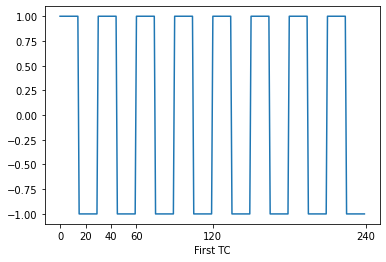

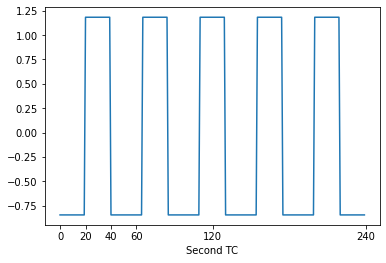

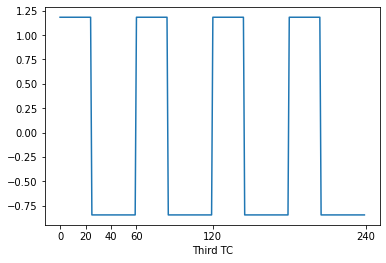

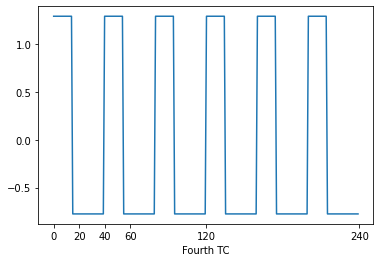

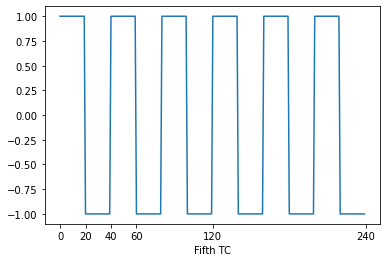

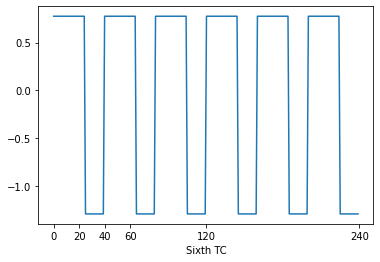

In [23]:
i = 1
LABEL = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth']
for tc in TC:
    plt.plot(tc)
    plt.xticks([0, 20, 40, 60, 120, 240])
    labl = LABEL[i-1] + " TC"
    plt.xlabel(labl)
    plt.savefig('../MAST30034-Assignment1/plots/Q1_1-' + str(i) + '.png')
    plt.show()
    i += 1

### Question 1.2

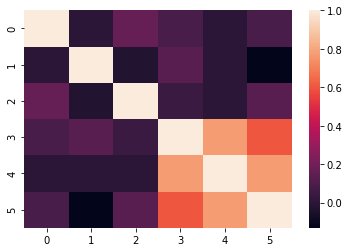

In [24]:
df = pd.DataFrame(TC)
tc_df = df.T
ax = sns.heatmap(tc_df.corr())
ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_2.png')

### Question 1.3

In [25]:
def one_slice(a, b, c, d):
    
    tmp_sm = np.zeros(V).reshape((X1,X2))
    
    for row in range(a-1, b):
        for col in range(c-1, d):
            tmp_sm[row][col] = 1.0
            
    return tmp_sm

In [26]:
#i) 02:06,02:06, ii) 02:06,15:19, iii) 08:13,02:06, iv) 08:13,15:19, v) 15:19,02:06, vi) 15:19,15:19
tmp1 = one_slice(2, 6, 2, 6)
tmp2 = one_slice(2, 6, 15, 19)
tmp3 = one_slice(8, 13, 2, 6)
tmp4 = one_slice(8, 13, 15, 19)
tmp5 = one_slice(15, 19, 2, 6)
tmp6 = one_slice(15, 19, 15, 19)

tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

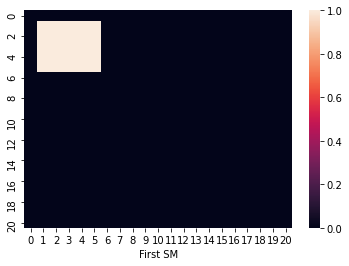

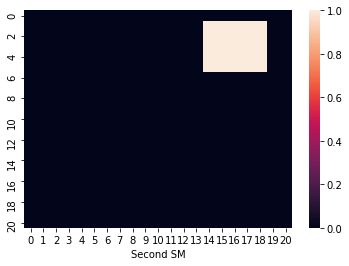

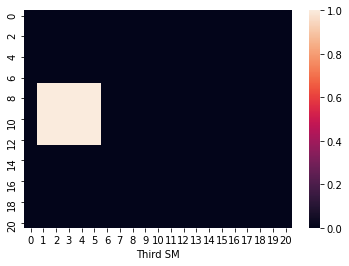

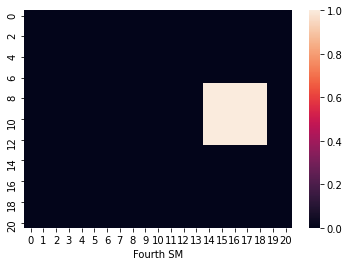

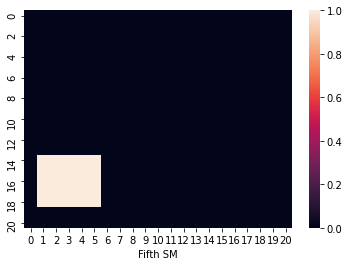

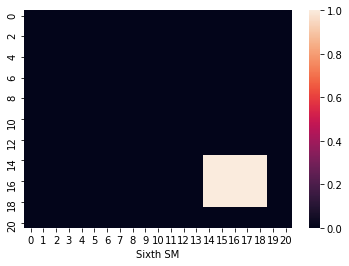

In [28]:
i = 1
for tmp in tmpSM:
    tmp_df = pd.DataFrame(tmp)
    ax = sns.heatmap(tmp_df)
    labl = LABEL[i-1] + " SM"
    plt.xlabel(labl)
    ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_3-' + str(i) + '.png')
    plt.show()
    i += 1

In [29]:
SM = tmpSM.reshape((NUM_SOURCE, V))

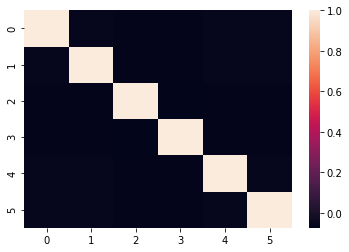

In [30]:
sm_df = pd.DataFrame(SM)
sm_df = sm_df.T
ax = sns.heatmap(sm_df.corr())
ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_3-' + str(i) + '.png')

### Question 1.4

In [31]:
temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(N * NUM_SOURCE)])
temp_noise = temp_noise.reshape((N,NUM_SOURCE))

spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(NUM_SOURCE * V)])
spatial_noise = spatial_noise.reshape((NUM_SOURCE,V))

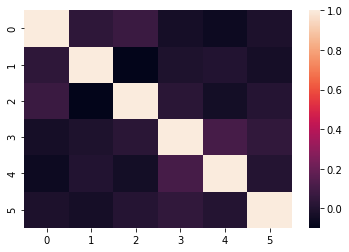

In [32]:
snoise_df = pd.DataFrame(spatial_noise)
snoise_df = snoise_df.T
ax = sns.heatmap(snoise_df.corr())
ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_4-1.png')

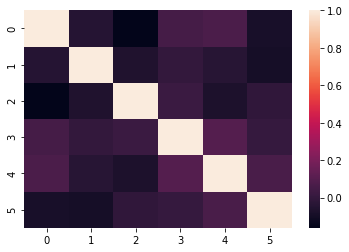

In [33]:
tnoise_df = pd.DataFrame(temp_noise)
ax = sns.heatmap(tnoise_df.corr())
ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_4-2.png')

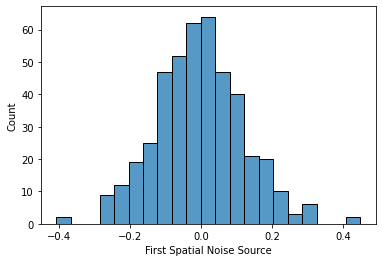

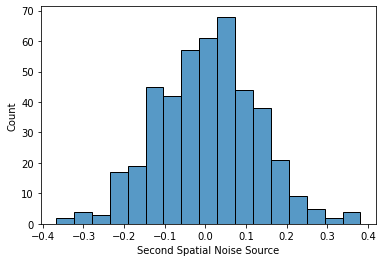

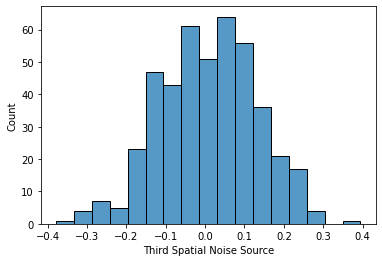

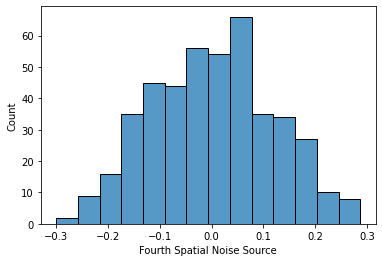

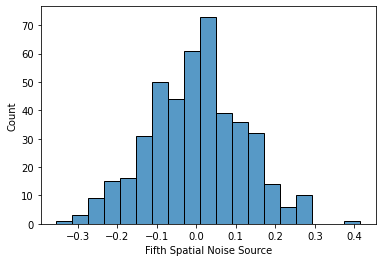

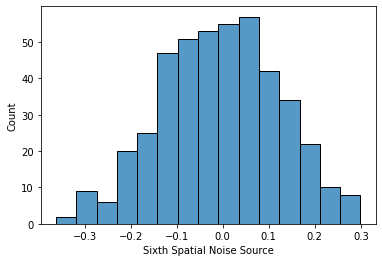

In [34]:
i = 1
for col in snoise_df:
    ax = sns.histplot(data=snoise_df[col])
    labl = LABEL[i-1] + " Spatial Noise Source"
    plt.xlabel(labl)
    ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_4-' + str(i+2) + '.png')
    plt.show()
    i += 1

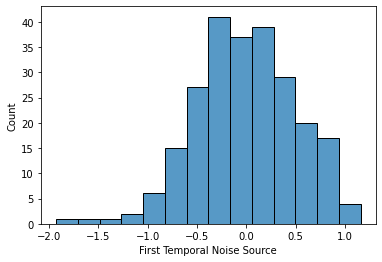

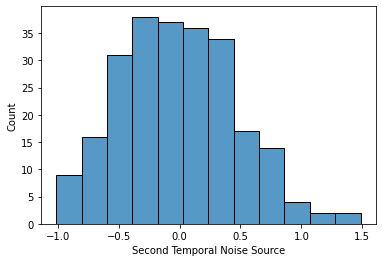

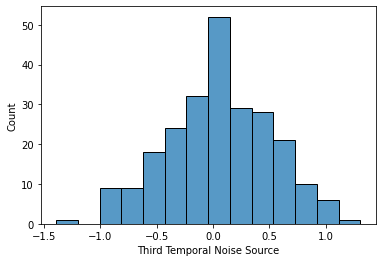

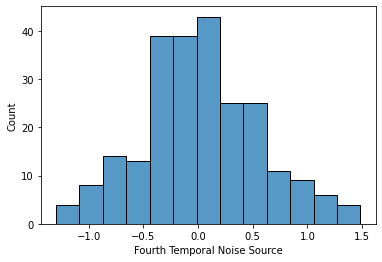

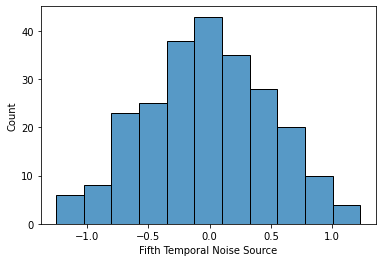

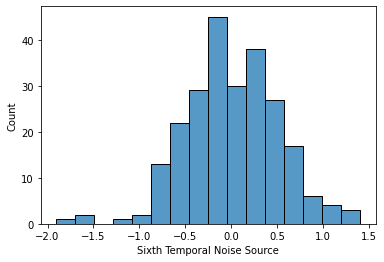

In [35]:
i = 1
for col in tnoise_df:
    ax = sns.histplot(data=tnoise_df[col])
    labl = LABEL[i-1] + " Temporal Noise Source"
    plt.xlabel(labl)
    ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_4-' + str(i+8) + '.png')
    plt.show()
    i += 1

In [36]:
TtTs = np.dot(temp_noise, spatial_noise)

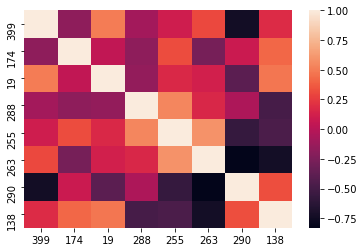

In [37]:
ttts_df = pd.DataFrame(TtTs)
mini_df = ttts_df[random.sample(range(0, 440),8)]
ax = sns.heatmap(mini_df.corr())
ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_4-15.png')

### Question 1.5

In [38]:
TC = np.transpose(TC)
X = np.dot((TC + temp_noise), (SM + spatial_noise))
X_df = pd.DataFrame(X)
randomly_selected = random.sample(list(range(0,V)), 100)
sample = X_df[randomly_selected]

In [ ]:
x = 0
y = 5
for i in range(5):
    fig, axes = plt.subplots(1, 4, figsize=(10,2))
    sns.lineplot(data= sample.iloc[:, x:y], ax = axes[0])
    sns.lineplot(data = sample.iloc[:, x+5:y+5], ax = axes[1])
    sns.lineplot(data= sample.iloc[:, x+10:y+10], ax = axes[2])
    sns.lineplot(data = sample.iloc[:, x+15:y+15], ax = axes[3])
    x+=15
    y+=15
    plt.savefig('../MAST30034-Assignment1/plots/Q1_5-'+ str(i+2) + '.png')
    plt.tight_layout()
    plt.show()

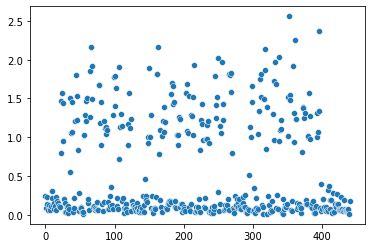

In [40]:
var = np.var(X_df)
ax = sns.scatterplot(data = var)
ax.figure.savefig('../MAST30034-Assignment1/plots/Q1_5-1.png')

In [41]:
# Standardise X
X = X - np.mean(X)
X = X / np.std(X)

### Question 2.1

In [42]:
DTD = np.dot(np.transpose(TC), TC)
DTD_inv = np.linalg.inv(DTD)
DTX = np.dot(np.transpose(TC), X)
A_lsr = np.dot(DTD_inv, DTX)
D_lsr = np.dot(X, np.transpose(A_lsr))

In [43]:
Alsr = []
for row in A_lsr:
    Alsr.append(row.reshape((X1, X2)))

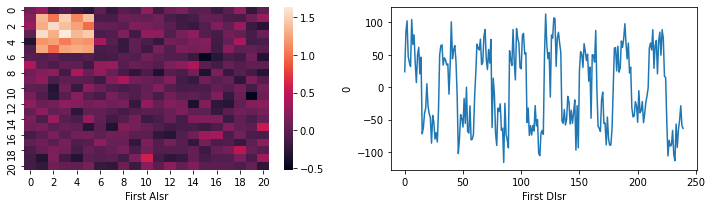

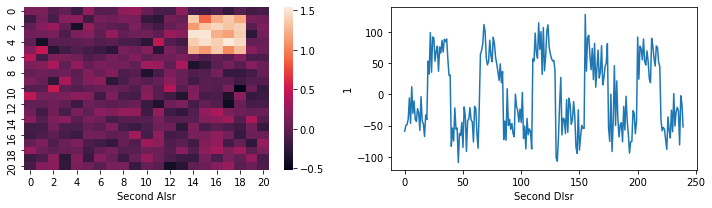

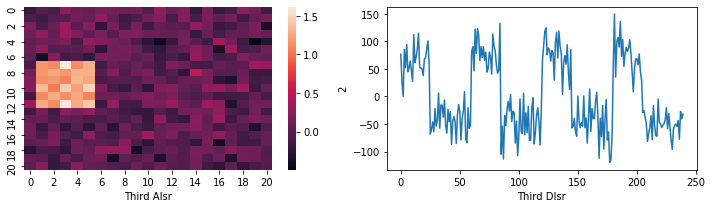

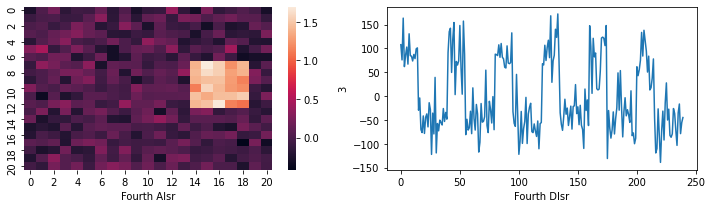

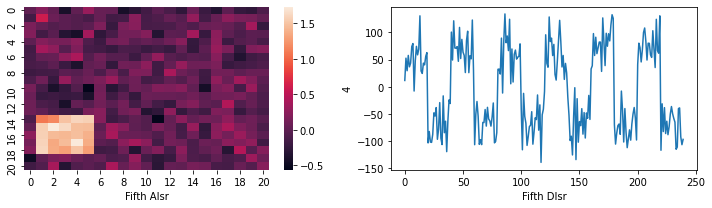

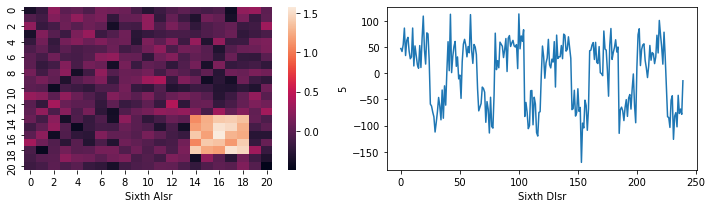

In [44]:
dlsr_df = pd.DataFrame(D_lsr)
for col in range(0, NUM_SOURCE):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    ax1 = sns.heatmap(data = Alsr[col], ax = axes[0])
    ax1.set(xlabel=LABEL[col] + ' Alsr')
    ax2 = sns.lineplot(data=dlsr_df[col], ax = axes[1])
    ax2.set(xlabel=LABEL[col] + ' Dlsr')
    plt.tight_layout()
    plt.savefig('../MAST30034-Assignment1/plots/Q2_1-' + str(col+1) + '.png')
    plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


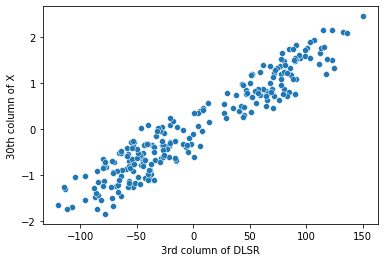

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


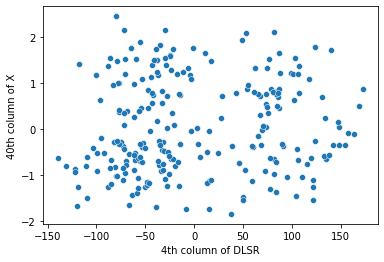

In [45]:
ax = sns.scatterplot(dlsr_df[2], X_df[9*X1 + 2])
ax.set(xlabel='3rd column of DLSR', ylabel='30th column of X')
plt.savefig('../MAST30034-Assignment1/plots/Q2_1-7.png')
plt.show()

ax = sns.scatterplot(dlsr_df[3], X_df[9*X1 + 2])
ax.set(xlabel='4th column of DLSR', ylabel='40th column of X')
plt.savefig('../MAST30034-Assignment1/plots/Q2_1-8.png')
plt.show()

### Question 2.2

In [46]:
lamda_hat = 0.5 * V
I = np.identity(6)
Z = DTD + np.dot(lamda_hat, I)
Z_inv = np.linalg.inv(Z)
A_rr = np.dot(Z_inv, DTX)
D_rr = np.dot(X, np.transpose(A_rr))

In [47]:
from scipy.stats import pearsonr

ctlsr = []
ctrr = []
for i in range(NUM_SOURCE):
        corr, _ = pearsonr(TC[i], D_lsr[i])
        ctlsr.append(corr)
        
        corr2, _ = pearsonr(TC[i], D_rr[i])
        ctrr.append(corr2)
        
print("Sum of CtRR greater than Sum of CtLSR: ", sum(ctrr) > sum(ctlsr))

Sum of CtRR greater than Sum of CtLSR:  True


In [48]:
lmda_alt = 1000 * V
Z_alt = DTD + np.dot(lmda_alt, I)
Z_inv_alt = np.linalg.inv(Z_alt)
Arr_alt = np.dot(Z_inv_alt, DTX)

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


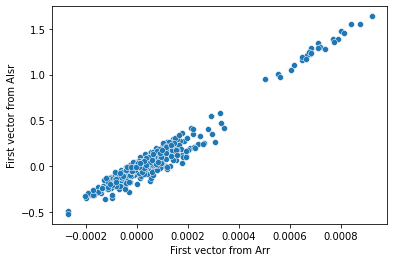

In [49]:
Arr_alt_df = pd.DataFrame(Arr_alt)
Arr_alt_df = Arr_alt_df.T

alsr_df = pd.DataFrame(A_lsr)
alsr_df = alsr_df.T

ax = sns.scatterplot(Arr_alt_df[0], alsr_df[0])
ax.set(xlabel='First vector from Arr', ylabel='First vector from Alsr')
plt.savefig('../MAST30034-Assignment1/plots/Q2_2-1.png')

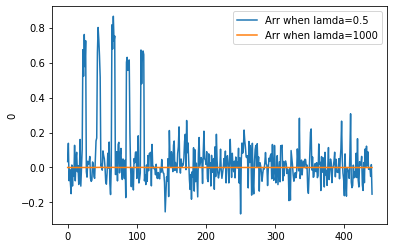

In [50]:
Arr_df = pd.DataFrame(np.transpose(A_rr))
sns.lineplot(data=Arr_df[0], label='Arr when lamda=0.5')
sns.lineplot(data=Arr_alt_df[0], label='Arr when lamda=1000')
plt.savefig('../MAST30034-Assignment1/plots/Q2_2-2.png')

In [51]:
Alsr_df = pd.DataFrame(A_lsr)
Drr_df = pd.DataFrame(D_rr)

In [52]:
tc_df = pd.DataFrame(TC)
X_df.to_csv("../MAST30034-Assignment1/data/X.csv")
sm_df.to_csv("../MAST30034-Assignment1/data/SM.csv")
tc_df.to_csv("../MAST30034-Assignment1/data/TC.csv")
Arr_df.to_csv("../MAST30034-Assignment1/data/Arr.csv")
Drr_df.to_csv("../MAST30034-Assignment1/data/Drr.csv")

In [53]:
def new_X(i):
    
    temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(N * NUM_SOURCE)])
    temp_noise = temp_noise.reshape((N,NUM_SOURCE))

    spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(NUM_SOURCE * V)])
    spatial_noise = spatial_noise.reshape((NUM_SOURCE,V))

    X = np.dot((TC + temp_noise), (SM + spatial_noise))
    X_df = pd.DataFrame(X)
    
    X_df.to_csv("../MAST30034-Assignment1/data/X" + str(i) + ".csv")
    return

for i in range(10):
    new_X(i+1)

### Question 2.3 onwards in other notebooks